<a href="https://colab.research.google.com/github/quantwav/Project-dsff/blob/main/0321_1901_Project_zsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [1]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [2]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00


In [18]:
from shapely.geometry import  Point
import geopandas as gpd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import cm
import urllib.request
import shutil
import zipfile
import re

!pip install contextily
import contextily as ctx

!pip install geoplot
import geoplot as gplt
import lightgbm as lgb
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt

!pip install pdpbox
from pdpbox import pdp, info_plots   # get_dataset

!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=a76c535435f6d3bd0873220435a4a8479787e31de27930a8f007530e843b915d
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00


In [3]:
if not os.path.exists("crime_data_2023demo.csv"):
    !gdown 1C2t0DbgCBBd_KfCFKFETCKi-ow0yiZWK

Downloading...
From: https://drive.google.com/uc?id=1C2t0DbgCBBd_KfCFKFETCKi-ow0yiZWK
To: /content/crime_data_2023demo.csv
100% 45.8M/45.8M [00:00<00:00, 95.3MB/s]


In [53]:
df_raw_crime = (
    pd.read_csv('crime_data_2023demo.csv',parse_dates=['dispatch_date'])
)
df_raw_crime.drop(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid',  'dc_key', 'psa', 'ucr_general', 'lat', 'lng'], axis=1, inplace=True)
df_raw_crime.rename(columns= {'point_x':'X', 'point_y':'Y', 'text_general_code':'Category' }, inplace = True)
df_raw_crime

dc_dist      dispatch_date_time dispatch_date dispatch_time  hour  \
0            25  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0   
1             1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0   
2             8  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0   
3            15  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0   
4            14  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0   
...         ...                     ...           ...           ...   ...   
169012        3  2023-12-25 22:09:00+00    2023-12-25      17:09:00  17.0   
169013       22  2023-12-26 14:31:00+00    2023-12-26      09:31:00   9.0   
169014       19  2023-12-26 17:36:00+00    2023-12-26      12:36:00  12.0   
169015        5  2023-12-26 17:12:00+00    2023-12-26      12:12:00  12.0   
169016       35  2023-12-26 17:08:00+00    2023-12-26      12:08:00  12.0   

                   location_block            Category          X          Y  
0         3300 BLOCK HARTVILLE ST  Robbery No Firearm -75.119482  39.998927  
1            2400 BLOCK S 28TH ST  Theft from Vehicle -75.193618  39.922350  
2       9800 BLOCK Roosevelt Blvd              Thefts -75.015070  40.094525  
3           4700 BLOCK GRISCOM ST              Thefts -75.083953  40.017896  
4             5500 BLOCK BLOYD ST  Robbery No Firearm -75.161898  40.044952  
...                           ...                 ...        ...        ...  
169012       400 BLOCK JACKSON ST  All Other Offenses -75.154349  39.921310  
169013       1700 BLOCK N 28TH ST      Other Assaults -75.179912  39.982169  
169014      1700 BLOCK N PEACH ST               Fraud -75.228574  39.983390  
169015      100 BLOCK KINGSLEY ST               Fraud -75.216240  40.022747  
169016      200 BLOCK FARISTON DR               Fraud -75.113225  40.047432  

[169017 rows x 9 columns]

In [54]:
from sklearn.model_selection import train_test_split

# Duplicates and outliers
df_raw_crime.drop_duplicates(inplace=True)
df_raw_crime.dropna()

# df_raw_crime.replace({'X': -120.5, 'Y': 90.0}, pd.NA, inplace=True)

df_raw_crime

dc_dist      dispatch_date_time dispatch_date dispatch_time  hour  \
0            25  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0   
1             1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0   
2             8  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0   
3            15  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0   
4            14  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0   
...         ...                     ...           ...           ...   ...   
169012        3  2023-12-25 22:09:00+00    2023-12-25      17:09:00  17.0   
169013       22  2023-12-26 14:31:00+00    2023-12-26      09:31:00   9.0   
169014       19  2023-12-26 17:36:00+00    2023-12-26      12:36:00  12.0   
169015        5  2023-12-26 17:12:00+00    2023-12-26      12:12:00  12.0   
169016       35  2023-12-26 17:08:00+00    2023-12-26      12:08:00  12.0   

                   location_block            Category          X          Y  
0         3300 BLOCK HARTVILLE ST  Robbery No Firearm -75.119482  39.998927  
1            2400 BLOCK S 28TH ST  Theft from Vehicle -75.193618  39.922350  
2       9800 BLOCK Roosevelt Blvd              Thefts -75.015070  40.094525  
3           4700 BLOCK GRISCOM ST              Thefts -75.083953  40.017896  
4             5500 BLOCK BLOYD ST  Robbery No Firearm -75.161898  40.044952  
...                           ...                 ...        ...        ...  
169012       400 BLOCK JACKSON ST  All Other Offenses -75.154349  39.921310  
169013       1700 BLOCK N 28TH ST      Other Assaults -75.179912  39.982169  
169014      1700 BLOCK N PEACH ST               Fraud -75.228574  39.983390  
169015      100 BLOCK KINGSLEY ST               Fraud -75.216240  40.022747  
169016      200 BLOCK FARISTON DR               Fraud -75.113225  40.047432  

[167316 rows x 9 columns]

In [55]:
# Split the dataset into training and testing sets (80% training, 20% testing)
train, test = train_test_split(df_raw_crime, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(train))
print("Testing set size:", len(test))
train

Training set size: 133852
Testing set size: 33464


dc_dist      dispatch_date_time dispatch_date dispatch_time  hour  \
7637         24  2023-01-18 23:34:00+00    2023-01-18      18:34:00  18.0   
146709       19  2023-11-21 18:05:00+00    2023-11-21      13:05:00  13.0   
113053       19  2023-09-11 21:21:00+00    2023-09-11      17:21:00   NaN   
68895         1  2023-05-29 12:01:00+00    2023-05-29      08:01:00   NaN   
103978       17  2023-08-11 14:14:00+00    2023-08-11      10:14:00   NaN   
...         ...                     ...           ...           ...   ...   
121264       35  2023-09-22 08:49:00+00    2023-09-22      04:49:00   NaN   
104917       35  2023-08-25 23:11:00+00    2023-08-25      19:11:00   NaN   
133391       22  2023-10-21 02:41:00+00    2023-10-20      22:41:00   NaN   
148407       12  2023-11-04 04:54:00+00    2023-11-04      00:54:00   NaN   
123356       14  2023-09-20 21:25:00+00    2023-09-20      17:25:00   NaN   

                  location_block                     Category          X  \
7637        3900 BLOCK CASTOR AV                       Thefts -75.099052   
146709      100 BLOCK N DEWEY ST                       Thefts -75.242789   
113053   4800 BLOCK LANCASTER AV                       Thefts -75.218874   
68895         2100 BLOCK Wolf St          Motor Vehicle Theft -75.181727   
103978     1200 BLOCK S BROAD ST           All Other Offenses -75.167812   
...                          ...                          ...        ...   
121264   6300 BLOCK N LAMBERT ST          Motor Vehicle Theft -75.154639   
104917     6300 BLOCK N BROAD ST                       Thefts -75.141854   
133391   2500 BLOCK N SARTAIN ST                         Rape -75.150618   
148407  2000 BLOCK S AVONDALE ST  Vandalism/Criminal Mischief -75.234774   
123356       800 BLOCK LOCUST AV    Receiving Stolen Property -75.161405   

                Y  
7637    40.005771  
146709  39.964357  
113053  39.973826  
68895   39.923342  
103978  39.935542  
...           ...  
121264  40.050487  
104917  40.050061  
133391  39.991019  
148407  39.927458  
123356  40.045497  

[133852 rows x 9 columns]

In [7]:
train.duplicated().sum()

0

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-8-13c5d8c4436a>:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


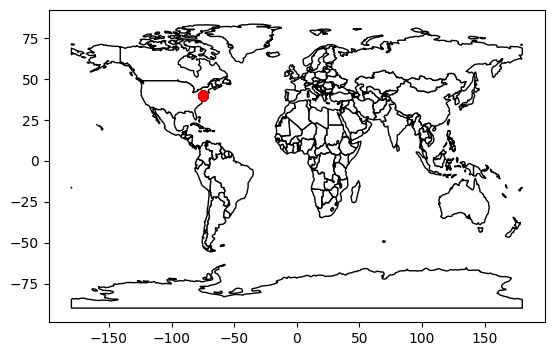

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def create_gdf(train_data):
    # Create a copy of the DataFrame
    gdf = train_data.copy()

    # Combine the latitude and longitude columns into a single 'Coordinates' column
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))

    # Convert the 'Coordinates' column to Point objects
    gdf.Coordinates = gdf.Coordinates.apply(Point)

    # Create a GeoDataFrame from the DataFrame with geometry set to 'Coordinates'
    # and coordinate reference system (CRS) set to EPSG 4326
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})

    return gdf

# You need to replace 'df' with your actual dataset
train_gdf = create_gdf(train)

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with land areas in white and boundaries in black
ax = world.plot(color='white', edgecolor='black')

# Plot the training GeoDataFrame on top of the world map with red color
train_gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()


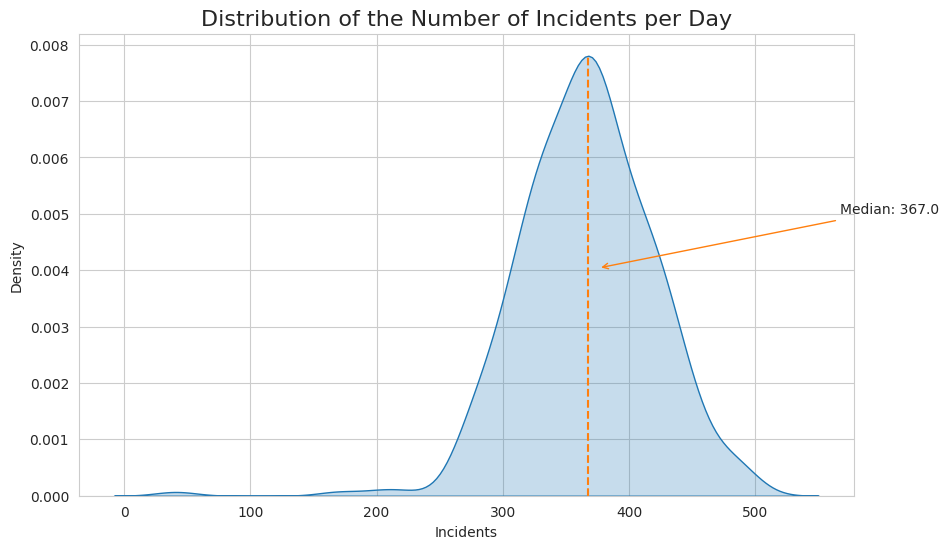

In [126]:
col = sns.color_palette()

# Calculate the date and hour
train['Date'] = train.dispatch_date.dt.date
train['Hour'] = train.dispatch_date.dt.hour

# Create the figure
plt.figure(figsize=(10, 6))

# Calculate the number of incidents per day and generate a kernel density plot
incident_count_per_day = train.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=incident_count_per_day, shade=True)

# Plot a dashed line at the median and add annotation
median_value = incident_count_per_day.median()
plt.axvline(x=median_value, ymax=0.95, linestyle='--', color=col[1])
plt.annotate('Median: ' + str(median_value),
             xy=(median_value, 0.004),
             xytext=(median_value + 200, 0.005),
             arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))

# Set the title and axis labels
plt.title('Distribution of the Number of Incidents per Day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()


In [10]:
# Extract the weekday information from the 'dispatch_date' column and assign it to a new column 'weekday'
train['weekday'] = train['dispatch_date'].dt.weekday

# Define a mapping between numerical representation of weekdays and their corresponding names
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the numerical representation of weekdays to their corresponding names using the mapping defined above
train['weekday'] = train['weekday'].map(weekday_mapping)

# Display the DataFrame with the added 'weekday' column containing the names of weekdays
train


dispatch_date_time dispatch_date dispatch_time  hour  \
7637    2023-01-18 23:34:00+00    2023-01-18      18:34:00  18.0   
146709  2023-11-21 18:05:00+00    2023-11-21      13:05:00  13.0   
113053  2023-09-11 21:21:00+00    2023-09-11      17:21:00   NaN   
68895   2023-05-29 12:01:00+00    2023-05-29      08:01:00   NaN   
103978  2023-08-11 14:14:00+00    2023-08-11      10:14:00   NaN   
...                        ...           ...           ...   ...   
121264  2023-09-22 08:49:00+00    2023-09-22      04:49:00   NaN   
104917  2023-08-25 23:11:00+00    2023-08-25      19:11:00   NaN   
133391  2023-10-21 02:41:00+00    2023-10-20      22:41:00   NaN   
148407  2023-11-04 04:54:00+00    2023-11-04      00:54:00   NaN   
123356  2023-09-20 21:25:00+00    2023-09-20      17:25:00   NaN   

                  location_block                     Category          X  \
7637        3900 BLOCK CASTOR AV                       Thefts -75.099052   
146709      100 BLOCK N DEWEY ST                       Thefts -75.242789   
113053   4800 BLOCK LANCASTER AV                       Thefts -75.218874   
68895         2100 BLOCK Wolf St          Motor Vehicle Theft -75.181727   
103978     1200 BLOCK S BROAD ST           All Other Offenses -75.167812   
...                          ...                          ...        ...   
121264   6300 BLOCK N LAMBERT ST          Motor Vehicle Theft -75.154639   
104917     6300 BLOCK N BROAD ST                       Thefts -75.141854   
133391   2500 BLOCK N SARTAIN ST                         Rape -75.150618   
148407  2000 BLOCK S AVONDALE ST  Vandalism/Criminal Mischief -75.234774   
123356       800 BLOCK LOCUST AV    Receiving Stolen Property -75.161405   

                Y        Date  Hour    weekday  
7637    40.005771  2023-01-18     0  Wednesday  
146709  39.964357  2023-11-21     0    Tuesday  
113053  39.973826  2023-09-11     0     Monday  
68895   39.923342  2023-05-29     0     Monday  
103978  39.935542  2023-08-11     0     Friday  
...           ...         ...   ...        ...  
121264  40.050487  2023-09-22     0     Friday  
104917  40.050061  2023-08-25     0     Friday  
133391  39.991019  2023-10-20     0     Friday  
148407  39.927458  2023-11-04     0   Saturday  
123356  40.045497  2023-09-20     0  Wednesday  

[133852 rows x 11 columns]

In [11]:
data = train.groupby('weekday').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])
data

weekday
Monday       20664
Tuesday      20530
Wednesday    20910
Thursday     19221
Friday       18988
Saturday     16876
Sunday       16663
Name: dispatch_date_time, dtype: int64

<ipython-input-12-da88dea73582>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-12-da88dea73582>:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


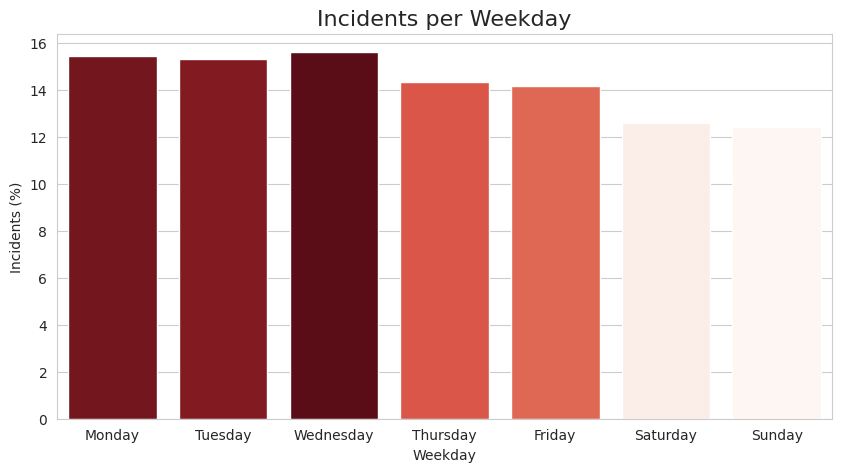

In [12]:
from matplotlib import cm  # Importing colormap module from matplotlib

plt.figure(figsize=(10, 5))  # Creating a figure with size 10x5 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a bar plot
    ax = sns.barplot(
        x = data.index,  # X-axis data (weekdays)
        y = (data.values / data.values.sum()) * 100,  # Y-axis data (percentage of incidents)
        orient='v',  # Orientation of the bars (vertical)
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values)  # Color palette for the bars
    )

# Setting title, xlabel, and ylabel
plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

# Displaying the plot
plt.show()


In [56]:
train

dc_dist      dispatch_date_time dispatch_date dispatch_time  hour  \
7637         24  2023-01-18 23:34:00+00    2023-01-18      18:34:00  18.0   
146709       19  2023-11-21 18:05:00+00    2023-11-21      13:05:00  13.0   
113053       19  2023-09-11 21:21:00+00    2023-09-11      17:21:00   NaN   
68895         1  2023-05-29 12:01:00+00    2023-05-29      08:01:00   NaN   
103978       17  2023-08-11 14:14:00+00    2023-08-11      10:14:00   NaN   
...         ...                     ...           ...           ...   ...   
121264       35  2023-09-22 08:49:00+00    2023-09-22      04:49:00   NaN   
104917       35  2023-08-25 23:11:00+00    2023-08-25      19:11:00   NaN   
133391       22  2023-10-21 02:41:00+00    2023-10-20      22:41:00   NaN   
148407       12  2023-11-04 04:54:00+00    2023-11-04      00:54:00   NaN   
123356       14  2023-09-20 21:25:00+00    2023-09-20      17:25:00   NaN   

                  location_block                     Category          X  \
7637        3900 BLOCK CASTOR AV                       Thefts -75.099052   
146709      100 BLOCK N DEWEY ST                       Thefts -75.242789   
113053   4800 BLOCK LANCASTER AV                       Thefts -75.218874   
68895         2100 BLOCK Wolf St          Motor Vehicle Theft -75.181727   
103978     1200 BLOCK S BROAD ST           All Other Offenses -75.167812   
...                          ...                          ...        ...   
121264   6300 BLOCK N LAMBERT ST          Motor Vehicle Theft -75.154639   
104917     6300 BLOCK N BROAD ST                       Thefts -75.141854   
133391   2500 BLOCK N SARTAIN ST                         Rape -75.150618   
148407  2000 BLOCK S AVONDALE ST  Vandalism/Criminal Mischief -75.234774   
123356       800 BLOCK LOCUST AV    Receiving Stolen Property -75.161405   

                Y  
7637    40.005771  
146709  39.964357  
113053  39.973826  
68895   39.923342  
103978  39.935542  
...           ...  
121264  40.050487  
104917  40.050061  
133391  39.991019  
148407  39.927458  
123356  40.045497  

[133852 rows x 9 columns]

In [14]:
data = train.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)
#data = data.reindex(np.append(np.delete(data.index, 1), 'OTHER OFFENSES'))
data

Category
Thefts                                     29602
Other Assaults                             20679
Motor Vehicle Theft                        17931
Vandalism/Criminal Mischief                13947
Theft from Vehicle                         10400
All Other Offenses                          9839
Fraud                                       6037
Aggravated Assault No Firearm               4057
Burglary Residential                        3005
Aggravated Assault Firearm                  2670
Weapon Violations                           2578
Robbery No Firearm                          2158
Narcotic / Drug Law Violations              2101
Robbery Firearm                             2051
Burglary Non-Residential                    1516
Receiving Stolen Property                   1189
Other Sex Offenses (Not Commercialized)      837
DRIVING UNDER THE INFLUENCE                  629
Arson                                        573
Rape                                         421
Offenses Against Family and Children         339
Homicide - Criminal                          306
Disorderly Conduct                           300
Prostitution and Commercialized Vice         237
Forgery and Counterfeiting                   190
Embezzlement                                 175
Liquor Law Violations                         51
Public Drunkenness                            21
Vagrancy/Loitering                             7
Gambling Violations                            3
Homicide - Justifiable                         2
Homicide - Gross Negligence                    1
Name: dispatch_date_time, dtype: int64

<ipython-input-15-042d2660fdfd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


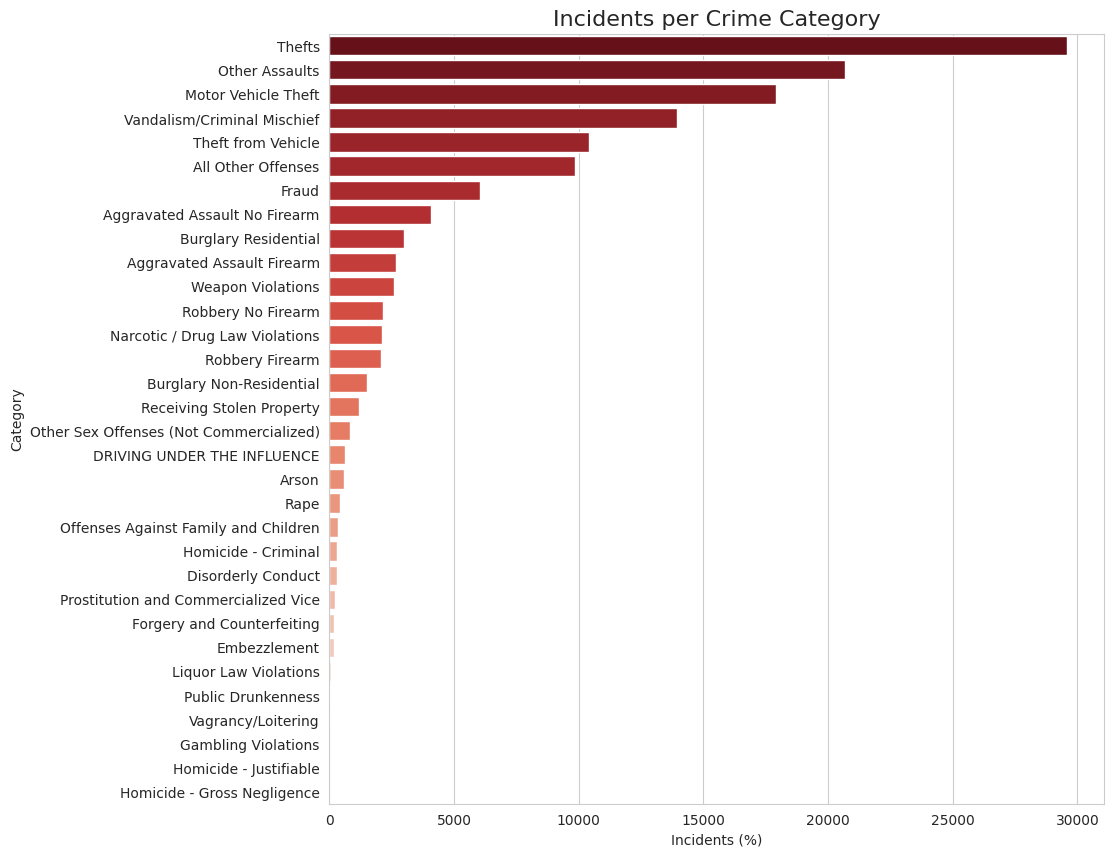

In [15]:
plt.figure(figsize=(10, 10))  # Creating a figure with size 10x10 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a horizontal bar plot
    ax = sns.barplot(
        x=data.values,  # X-axis data (percentage of incidents)
        y=data.index,  # Y-axis data (crime categories)
        orient='h',  # Orientation of the bars (horizontal)
        palette="Reds_r"  # Color palette for the bars (reversed 'Reds' colormap)
    )

# Setting title and xlabel
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

# Displaying the plot
plt.show()


# **Visualization**

Police Districts

<Figure size 1000x1000 with 0 Axes>

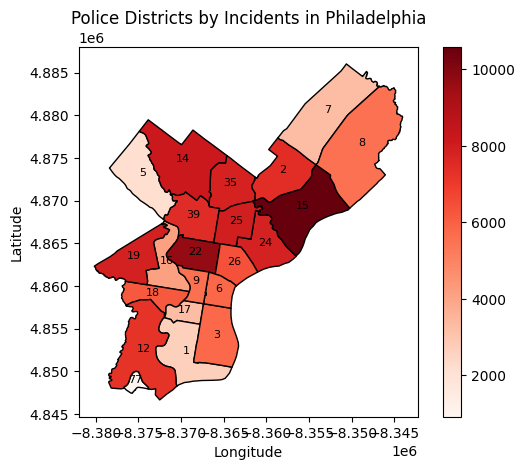

In [66]:
# Downloading the shapefile of the area
if not os.path.exists("Boundaries_District.zip"):
    !gdown 1MreKdCXa3sUmJWjZDVUwPtqc4G_7M6Qa

# Unzipping the data
with zipfile.ZipFile('Boundaries_District.zip', 'r') as zip_ref:
    zip_ref.extractall('Boundaries_District')

# Loading into a geopandas DataFrame
for filename in os.listdir('./Boundaries_District/'):
    if filename.endswith(".shp"):
        pd_districts_philly = gpd.read_file('./Boundaries_District/'+filename)
        break
pd_districts_philly

# Defining the coordinate system to longitude/latitude
pd_districts_philly.crs={'init': 'epsg:4326'}

# Merging the dataset and converting coordinate system
pd_districts_philly = pd_districts_philly.to_crs(epsg=3857)

# Calculating the number of incidents for each police district
incident_counts = train.groupby('dc_dist').size()
pd_districts_philly['Incidents'] = pd_districts_philly['DIST_NUM'].map(incident_counts)

plt.figure(figsize=(10, 10))
ax = pd_districts_philly.plot(column='Incidents', cmap='Reds', edgecolor='black', legend=True)

# Annotate each district with its district code
for idx, row in pd_districts_philly.iterrows():
    ax.annotate(text=row['DIST_NUM'], xy=row.geometry.centroid.coords[0], horizontalalignment='center', fontsize=8)

plt.title('Police Districts by Incidents in Philadelphia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **Exploratory Visualization**

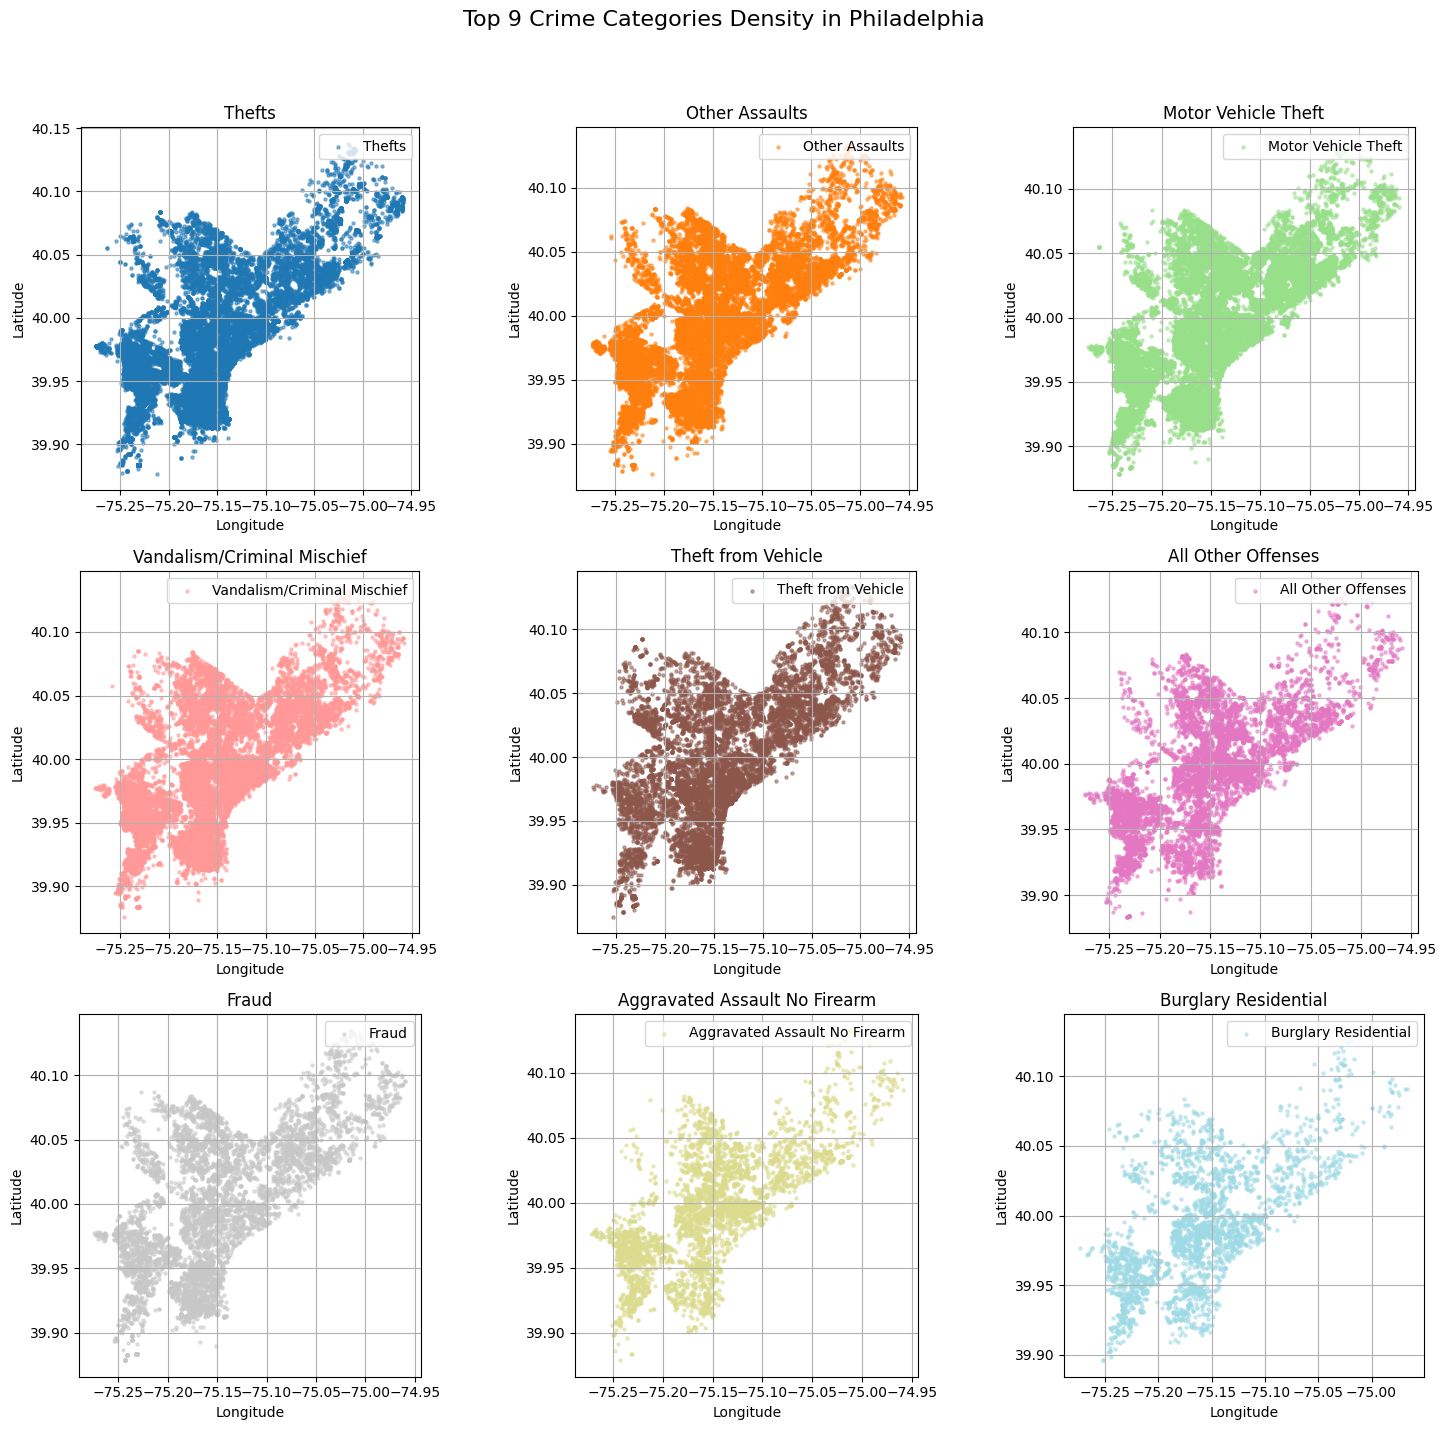

In [89]:
# Get the top nine most frequent crime categories
top_categories = train['Category'].value_counts().head(9).index.tolist()

# Filter the DataFrame to include only these categories
train_top = train[train['Category'].isin(top_categories)]

# Convert latitude and longitude to a GeoDataFrame
geometry = [Point(xy) for xy in zip(train_top['X'], train_top['Y'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(train_top, crs=crs, geometry=geometry)

# Set up the grid of plots
cols = 3  # Number of columns in the grid
rows = -(-len(top_categories) // cols)  # Round up division to get number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Create a colormap
norm = plt.Normalize(vmin=0, vmax=len(top_categories))
cmap = cm.get_cmap('tab20', len(top_categories))

# Plot each crime category on a separate subplot
for i, category in enumerate(top_categories):
    row_idx = i // cols
    col_idx = i % cols
    ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]

    category_df = geo_df[geo_df['Category'] == category]
    category_df.plot(ax=ax, color=cmap(norm(i)), markersize=5, label=category, alpha=0.5)

    ax.set_title(category)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend(loc='upper right')
    ax.grid(True)

# Hide empty subplots
if len(top_categories) < rows * cols:
    for i in range(len(top_categories), rows * cols):
        row_idx = i // cols
        col_idx = i % cols
        axes[row_idx, col_idx].axis('off')

plt.suptitle('Top 9 Crime Categories Density in Philadelphia', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [102]:
# Downloading the shapefile of the area
if not os.path.exists("City_Plan_Boundary-shp.zip"):
    !gdown 1G91O976mxfNC_SJZWsqlFmUE3TYuD2cP

# Unzipping the data
with zipfile.ZipFile('City_Plan_Boundary-shp.zip', 'r') as zip_ref:
    zip_ref.extractall('City_Plan_Boundary-shp')

Downloading...
From: https://drive.google.com/uc?id=1G91O976mxfNC_SJZWsqlFmUE3TYuD2cP
To: /content/City_Plan_Boundary-shp.zip
100% 194k/194k [00:00<00:00, 83.9MB/s]


In [120]:
# 获取前九个犯罪类别（不包括 'TREA'）
top_crimes = train['Category'].value_counts().nlargest(9).index.tolist()

# 将警区数据转换为经纬度坐标系
pd_districts = pd_districts.to_crs({'init':'epsg:4326'})

# 获取整个城市的地理边界
sf_land = pd_districts.unary_union
sf_land = gpd.GeoDataFrame(gpd.GeoSeries(sf_land), crs={'init': 'epsg:4326'})

# 创建画布和子图
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 12))

# 在每个子图中绘制前九个犯罪类型的地理密度图
for i, crime in enumerate(top_crimes):
    data = train_gdf.loc[train_gdf['Category'] == crime]
    ax = axs[i // 3, i % 3]
    gplt.kdeplot(data,
                 shade=True,
                 shade_lowest=False,
                 clip=sf_land.geometry,
                 cmap='Reds',
                 ax=ax,
                 projection=gcrs.PlateCarree())  # 使用 PlateCarree 投影
    gplt.polyplot(sf_land, ax=ax, projection=gcrs.PlateCarree())  # 绘制城市边界
    ax.set_title(crime)

# 调整布局并显示图形
plt.suptitle('Geographic Density of Top 9 Crimes')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Supply geometry using the 'geometry=' keyword argument, or by providing a DataFrame with column name 'geometry'

In [151]:
# 计算每个小时内每种犯罪类型的平均发生次数
hourly_avg_crime = train.groupby(['Category', 'Hour']).size().unstack()
print(hourly_avg_crime)

# 获取前五个犯罪类型
top_five_categories = hourly_avg_crime.nlargest(5).index

# 绘制折线图
plt.figure(figsize=(10, 6))
for category in top_five_categories:
    plt.plot(hourly_avg_crime[category], label=category)

plt.title('Average Number of Incidents per Hour for Top Five Crime Categories')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Incidents')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

Hour                                         0
Category                                      
Aggravated Assault Firearm                2670
Aggravated Assault No Firearm             4057
All Other Offenses                        9839
Arson                                      573
Burglary Non-Residential                  1516
Burglary Residential                      3005
DRIVING UNDER THE INFLUENCE                629
Disorderly Conduct                         300
Embezzlement                               175
Forgery and Counterfeiting                 190
Fraud                                     6037
Gambling Violations                          3
Homicide - Criminal                        306
Homicide - Gross Negligence                  1
Homicide - Justifiable                       2
Liquor Law Violations                       51
Motor Vehicle Theft                      17931
Narcotic / Drug Law Violations            2101
Offenses Against Family and Children       339
Other Assault

TypeError: DataFrame.nlargest() missing 1 required positional argument: 'columns'